# Compare Perform PCA and LDA

# Install and import relevant libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import seaborn as sns

# Read and load the data

In [12]:
def load_dataset(filepath, names):
    """Charge un fichier CSV en DataFrame avec des noms de colonnes spécifiés."""
    return pd.read_csv(filepath, header=None, delimiter=' ', names=names)

def concatenate_dataframes(class_df, df1, df2):
    """Concatène les DataFrames class_df, df1, et df2 horizontalement."""
    return pd.concat([class_df, df1, df2], axis=1)

# Noms des colonnes pour chaque fichier
names_1 = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7']
names_2 = ['Feature8', 'Feature9', 'Feature10', 'Feature11', 'Feature12', 'Feature13', 'Feature14']

# Chargement des DataFrames
df_1 = load_dataset("../Ressources/Datasets/stand_norm_e1.txt", names_1)
df_2 = load_dataset("../Ressources/Datasets/stand_norm_e2.txt", names_2)
new_values = load_dataset("../Ressources/Datasets/y2_e1.txt", ['Class'])

# Concaténation des DataFrames
df = concatenate_dataframes(new_values, df_1, df_2)

# Affichage des premières lignes du DataFrame final
df.head(len(df))

,Class,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14
0,0.0,35.533354,220.110174,185.322913,714.120693,3719.146472,0.199611,0.807951,31.626118,345.489585,465.024867,353.379868,679.766033,0.199611,1.172721
1,0.0,12.153222,290.799141,371.267847,825.465771,235.087734,0.233832,0.710784,14.583007,297.938838,238.719070,1180.971365,1441.838840,0.233832,0.871765
2,0.0,15.687117,245.596011,432.266516,969.556869,4529.009906,0.266850,0.607620,14.940141,375.341165,439.139407,1028.171307,2469.411191,0.266850,0.786855
3,0.0,4.130666,266.347021,1400.323393,1503.693799,2897.194341,0.298691,0.572977,31.846588,304.508444,594.597040,1049.210472,1477.424605,0.298691,0.852576
4,0.0,1.666385,72.802457,107.825008,1057.444093,2901.767221,0.329382,0.613656,5.950176,94.237243,73.547132,396.930317,669.509993,0.329382,0.856799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12805,0.0,3.851420,115.558659,38.865765,512.790147,1403.891146,1.683803,0.981003,20.521331,255.291245,69.638338,58.645717,248.293827,1.683803,1.334752
12806,0.0,26.924435,195.108723,36.567537,559.356964,287.251317,1.742832,1.241980,46.152025,280.984170,22.588877,97.207134,97.334776,1.742832,1.388819
12807,0.0,10.201896,92.691810,60.630080,111.331959,426.887229,1.803927,1.228706,18.222472,124.216958,91.341961,56.843374,493.068512,1.803927,1.363538
12808,0.0,24.657509,70.277027,23.014987,58.710847,748.486167,1.867127,1.103956,42.625600,143.469790,41.622062,86.254182,290.279950,1.867127,1.278275


In [13]:
# Function to display correlation matrix
def correlation_matrix(df):
    fig = plt.figure(figsize=(16, 12))
    ax1 = fig.add_subplot(111)
    cmap = plt.cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Features Correlation Matrix', fontsize=15)
    labels = df.columns
    ax1.set_xticklabels(labels, fontsize=9)
    ax1.set_yticklabels(labels, fontsize=9)
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11, 11)])
    plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_46104\2371143171.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet', 30)
C:\Users\gabri\AppData\Local\Temp\ipykernel_46104\2371143171.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels, fontsize=9)
C:\Users\gabri\AppData\Local\Temp\ipykernel_46104\2371143171.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(labels, fontsize=9)


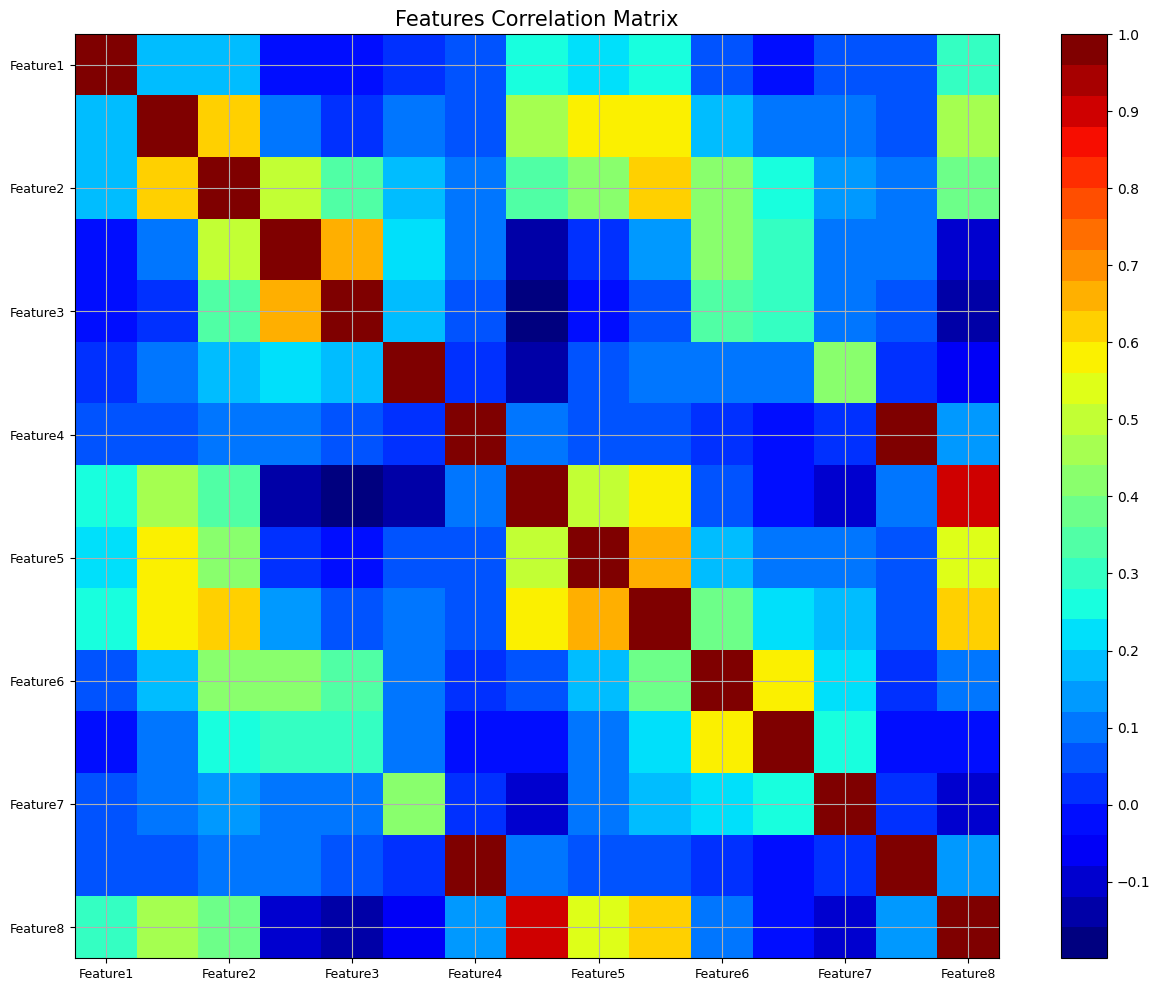

In [14]:
# Display correlation matrix
correlation_matrix(df)

In [15]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# X = df.drop('Class', axis=1) : creates a new DataFrame X containing all the columns of the DataFrame df except for the 'Class' column
# y = df['Class']: This line creates a new Series y containing only the values from the 'Class' column of the DataFrame df.

# Standardize features


In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# StandardScaler is a preprocessing technique used to standardize features by removing the mean and scaling to unit variance


# Perform PCA

In [17]:
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance ratio

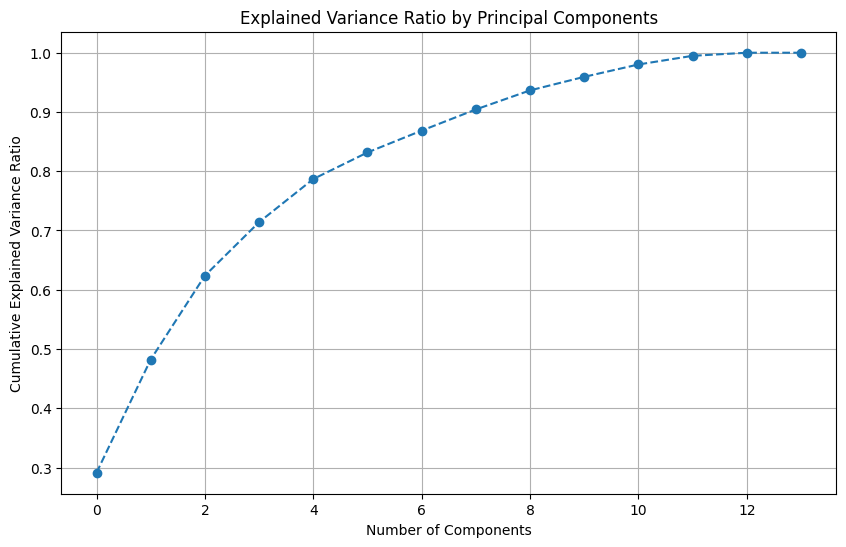

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# Perform LDA

In [19]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Split data into training and testing sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Train and test PCA model

In [21]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train and test LDA model

In [22]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Evaluate PCA and LDA performance

In [23]:
pca_score = pca.score(X_test, y_test)
lda_score = lda.score(X_test, y_test)

# Compare performance

In [24]:
if pca_score > lda_score:
    print("PCA outperforms LDA with a score of {:.2f}".format(pca_score*100))
else:
    print("LDA outperforms PCA with a score of {:.2f}".format(lda_score*100))

# lda_score typically refers to the accuracy of the LDA model in correctly predicting the class labels.
# pca_score might represent some form of model fitness or goodness-of-fit measure for the PCA model.

LDA outperforms PCA with a score of 77.71
